<a href="https://colab.research.google.com/github/gakurujnr/Autolib-electric-car-sharing-service-company/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_2019_08_Peter_Gakuru_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

To determine which day of the week blue cars are most popular

## Metrics For Success

- Understanding the contenxt and be able to carry out experimental Design such as

- Univariate Analysis

- Bivariate Analysis

- Multivariate Analysis

- Create bar graphs, histo graphs, line, scatter plots, heatmaps correlations for the inorder to get insights

Identifying the z_score in to compare with the significant value

## Context

## Experimental Designs

Find and ideal with outliers, anomalies, and missing data within the dataset.
Identifying and comming up with your Hypothesis
Observations and possible solutions based on findings

## All Imports

In [0]:
## Importing libraries

#Import pandas
import pandas as pd

#Importing numpy
import numpy as np

# Import matplotlid
import matplotlib.pyplot as plt
%matplotlib inline

##Import seaborn
import seaborn as sns

# pandas profiling provides a summary report, including descriptive statistics of the dataset 
import pandas_profiling as pr

## Loading Data

In [77]:
## Loading the dataset
blu = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
blu.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [78]:
## load the the dictionary of the dataset
dictionary = pd.read_excel("/content/columns_explanation.xlsx")
dictionary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [79]:
## View information of our data
blu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [80]:
## Viewing the size of the data
len(blu)

16085

In [81]:
## Viewing the shape of the dataset in rows and columns
blu.shape

## Has 16085 rows and 13 columns

(16085, 13)

In [82]:
## Viewing the data types of the dataset
blu.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## Tidyng the dataset 

In [83]:
## Creating a copy of dataset to work on and not altering or affecting the original data
bl = blu.copy()
bl.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [84]:
# Checking the columns
bl.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [85]:
## Replacing and writing columns in lower case
bl.columns = bl.columns.str.lower().str.replace(' ', '_')
bl.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
## Renaming inappropriate column names
bl.rename(columns = {"n_daily_data_points": "daily_data_points", "dayofweek": "day_of_week"}, inplace = True)

In [87]:
## Checking if the column names have changed
bl.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [88]:
## Checking the sum for duplicate values in the dataset
bl.duplicated().sum()

## The dataset has no duplicate values

0

### Checking Null Values

In [89]:
## Checking if there are any null values
bl.isnull().sum()

## There are no null/missing values on this dataset

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

There are no null values in the dataset

In [90]:
bl.dtypes

postal_code                int64
date                      object
daily_data_points          int64
day_of_week                int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

In [91]:
# converting date column to datetime
bl.date = pd.to_datetime(bl.date)

bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
postal_code               16085 non-null int64
date                      16085 non-null datetime64[ns]
daily_data_points         16085 non-null int64
day_of_week               16085 non-null int64
day_type                  16085 non-null object
bluecars_taken_sum        16085 non-null int64
bluecars_returned_sum     16085 non-null int64
utilib_taken_sum          16085 non-null int64
utilib_returned_sum       16085 non-null int64
utilib_14_taken_sum       16085 non-null int64
utilib_14_returned_sum    16085 non-null int64
slots_freed_sum           16085 non-null int64
slots_taken_sum           16085 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 1.6+ MB


In [92]:
## checking if the date column has converted
bl.head(3)

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27


In [0]:
## 
# selecting columns day_type = weekday as will be working with weekdays only

bl = bl[bl['day_type'] == 'weekday']

In [94]:
## Preview some of the dataset to see if it has selected the data_type weekday
bl.head()

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
## # Dropping irrelevant columns that is not needed in our dataset as it's not of any use
bl.drop(columns=['daily_data_points', 'day_type'], inplace=True)


In [96]:
## Confirm if the column is dropped
bl.columns

Index(['postal_code', 'date', 'day_of_week', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

## Checking For Outliers

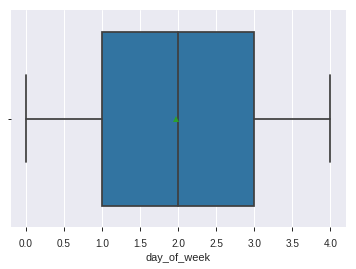

In [97]:
##
sns.boxplot(bl['day_of_week'], showmeans = True)

The days of the week column has no outliers and has its mean exactly at 2.0

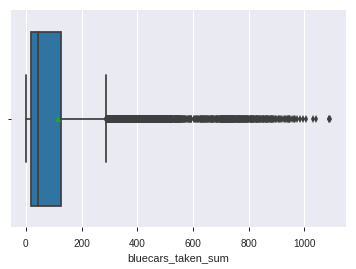

In [98]:
# checking outliers in bluecars_taken_sum
sns.boxplot(bl['bluecars_taken_sum'], showmeans = True)

Has outliers. I wont drop the outliers as the blue cars that were taken sum is 1400

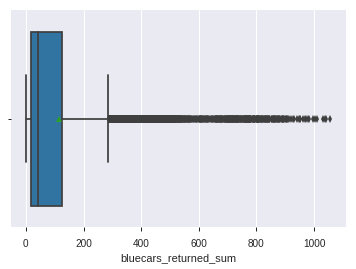

In [99]:
# bluecars_returned_sum 
sns.boxplot(bl['bluecars_returned_sum'], showmeans = True)

Has outliers. I wont drop the outliers as the blue cars that were taken sum is 1400

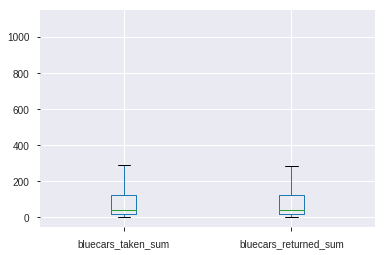

In [100]:
## Boxplot that shows outliers of the bluecars_taken_sum and bluecars_returned_sum
boxplot = bl.boxplot(["bluecars_taken_sum","bluecars_returned_sum"])
plt.show()

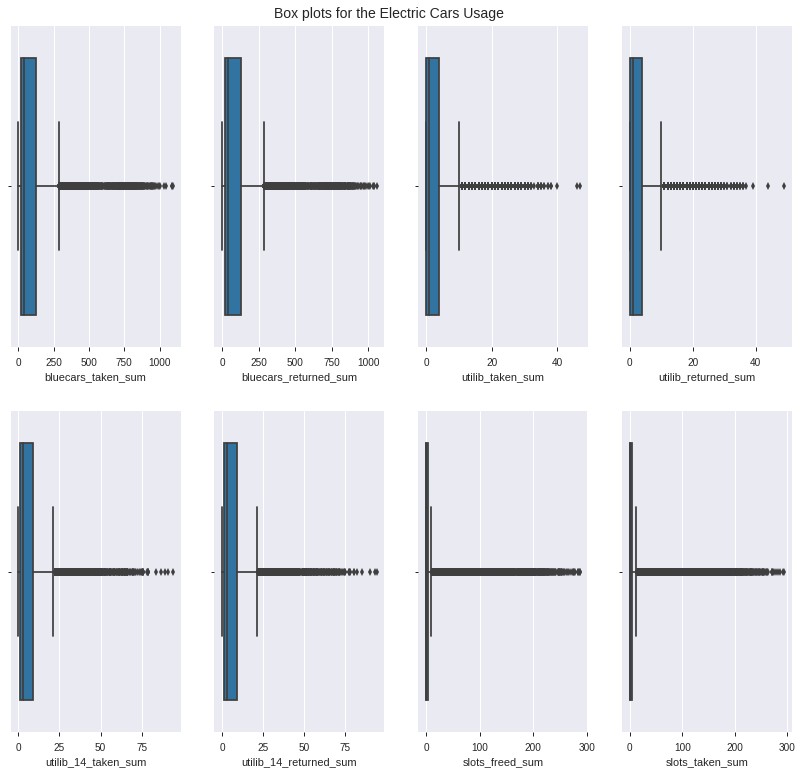

In [101]:
##
# checking for outliers in columns[3:]

box, zzx = plt.subplots(2,4, figsize=(14,13))
box.suptitle('Box plots for the Electric Cars Usage', fontsize=14, y=0.9)

for ax, column in zip(zzx.flatten(), bl.columns[3:]):    
  sns.boxplot(bl[column], ax = ax)
  


Boxplots indicates there are many outliers in plotted columns
But, we won't drop the outliers since they are reasonable outliers 

In [102]:
##
# Removing outliers from the created dataframe using IQR
for c in bl.columns[5:]:
  Q1 = bl[c].quantile(0.25)
  Q3 = bl[c].quantile(0.75)
  
  IQR = Q3 - Q1
  
bl1 = bl[~((bl[c] < Q1 - 1.5*IQR) | (bl[c] > Q3 + 1.5*IQR))]
bl1.head()

,postal_code,date,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
22,75001,2018-01-23,1,112,113,3,3,10,10,11,9
29,75001,2018-01-30,1,103,103,2,2,3,3,11,11
36,75001,2018-02-06,1,118,118,4,4,3,3,12,11
49,75001,2018-02-19,0,85,86,1,1,9,9,12,12
50,75001,2018-02-20,1,100,98,3,3,9,9,11,11


In [103]:
bl1.tail()

,postal_code,date,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
16078,95880,2018-06-13,2,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,3,15,13,0,0,0,0,0,0
16080,95880,2018-06-15,4,15,10,0,0,2,3,0,0
16083,95880,2018-06-18,0,11,14,3,5,2,2,0,0
16084,95880,2018-06-19,1,2,2,2,1,0,0,0,0


In [104]:
##
## Pandas profiling 
# import pandas_profiling
pr.ProfileReport(bl)

Number of variables,12
Number of observations,11544
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,6


This variable is highly correlated with bluecars_taken_sum and should be ignored for analysis

## Exploratory Data Analysis

In [105]:
# checking for the sum of bluecars taken in each day of the week

bl.groupby('day_of_week')[['bluecars_taken_sum']].sum().sort_values('bluecars_taken_sum', ascending=False)

,bluecars_taken_sum
day_of_week,
4,288546
0,263893
3,263207
1,261940
2,261849


Most blue cars are taken on Friday by a sum of 288546
Least cars were taken on Wednesday by a sum of 261849

In [106]:
## # checking for the sum of bluecars returned in each day of the week
#
bl.groupby('day_of_week')[['bluecars_returned_sum']].sum().sort_values('bluecars_returned_sum', ascending=False)

,bluecars_returned_sum
day_of_week,
4,286029
0,264808
3,262961
2,260673
1,260470


Most blue cars were returned on Friday by a sum of 286029
Least cars were retuned on Tuesday having a sum of 260470

## Data Analysis

## Univariate

In [0]:
# Mapping the day column from 0-4 to Monday-Friday
bl.day_of_week = bl.day_of_week.map({0:'monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

In [124]:
# frequency table of bluecars_returned_sum column
## Value counts of the days of the week
bl['day_of_week'].value_counts()

monday       2374
Tuesday      2363
Friday       2271
Wednesday    2268
Thursday     2268
Name: day_of_week, dtype: int64

#### Measure of Central Tendency

In [108]:
## The mean of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum and slots_taken_sum 

name_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in name_col:
  print('mean of {}: {:.2f}' .format(column, bl[column].mean()))

mean of bluecars_returned_sum: 115.64
mean of bluecars_taken_sum: 116.03
mean of slots_freed_sum: 20.95
mean of slots_taken_sum: 20.92


In [109]:
##
# The median of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum and slots_taken_sum 

med_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in med_col:
  print('Median of %s: %d' % (column, bl[column].median()))

Median of bluecars_returned_sum: 42
Median of bluecars_taken_sum: 42
Median of slots_freed_sum: 0
Median of slots_taken_sum: 0


The columns slots_freed_sum and slots_taken_sum have a median 0, while that of the bluecars_returned_sum and bluecars_taken_sum median is 42

In [110]:
##
# The mode of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum, slots_taken_sum and day_of_week

mode_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum', 'day_of_week']

for column in mode_col:
  print('mode of %s: %d' % (column, bl[column].mode()))

mode of bluecars_returned_sum: 12
mode of bluecars_taken_sum: 12
mode of slots_freed_sum: 0
mode of slots_taken_sum: 0
mode of day_of_week: 0


day 0 which is Monday features the most in the dataset
in most cases, the sum of returned bluecars and taken bluecars was 12

In [111]:
## standard deviation  of columns of the dataframe
bl.std(axis = 0)

postal_code               7647.995374
day_of_week                  1.417797
bluecars_taken_sum         169.626905
bluecars_returned_sum      168.344751
utilib_taken_sum             5.379950
utilib_returned_sum          5.349742
utilib_14_taken_sum         11.963164
utilib_14_returned_sum      11.882660
slots_freed_sum             47.900208
slots_taken_sum             47.848580
dtype: float64

In [112]:
## standard deviation of rows of the dataframe
bl.std(axis=1)

0        23707.631092
1        23708.432584
2        23705.621489
3        23707.664201
4        23707.216411
7        23709.619736
8        23710.182571
9        23708.565911
10       23705.851680
11       23706.557792
14       23707.948032
15       23707.252376
16       23707.359724
17       23706.236043
18       23706.209404
21       23707.572826
22       23707.882613
23       23706.610098
24       23706.527248
25       23704.079484
28       23710.147138
29       23709.036552
30       23708.337525
31       23706.754018
32       23704.431751
35       23707.081081
36       23707.817751
37       23707.834974
38       23707.389256
39       23707.985040
             ...     
16042    30318.794354
16045    30319.075166
16046    30318.092768
16047    30318.794412
16048    30319.004913
16049    30318.408387
16052    30318.302944
16053    30317.039458
16055    30317.917350
16056    30319.075144
16057    30318.688847
16058    30318.653811
16059    30318.969750
16062    30319.602037
16063    3

In [113]:
## variance of the columns in the dataframe
##
bl.var(axis=0)

postal_code               5.849183e+07
day_of_week               2.010149e+00
bluecars_taken_sum        2.877329e+04
bluecars_returned_sum     2.833996e+04
utilib_taken_sum          2.894387e+01
utilib_returned_sum       2.861974e+01
utilib_14_taken_sum       1.431173e+02
utilib_14_returned_sum    1.411976e+02
slots_freed_sum           2.294430e+03
slots_taken_sum           2.289487e+03
dtype: float64

In [114]:
## Skewness of the columns as that is the one needed
bl.skew(axis = 0)

postal_code              -1.168416
day_of_week               0.027247
bluecars_taken_sum        2.328198
bluecars_returned_sum     2.328973
utilib_taken_sum          2.509845
utilib_returned_sum       2.508215
utilib_14_taken_sum       2.486728
utilib_14_returned_sum    2.487935
slots_freed_sum           2.542187
slots_taken_sum           2.542346
dtype: float64

We don't look for skewness for rows as its not important
postal_code skew is the only one with negative this means that distribution is negatively skewed, the distribution skewed to the left. The tail on the left hand side is longer than tail on the right hand side

In [115]:
## Kurtosis of the columns 
##
bl.kurt(axis = 0)

postal_code              -0.543010
day_of_week              -1.307216
bluecars_taken_sum        5.553808
bluecars_returned_sum     5.542863
utilib_taken_sum          7.368654
utilib_returned_sum       7.347394
utilib_14_taken_sum       7.089539
utilib_14_returned_sum    7.123847
slots_freed_sum           6.007230
slots_taken_sum           6.001265
dtype: float64

The colunm kurt of postal_code and day_of_week is negative which is less than 0 the distribution is light tailed thus(Platykurtic), thus the rest of the columns are greater than 0 means the distribution is heavy tailed(Leptokurtic)

In [143]:
## Finding the IQR of the dataframe
bl.quantile([0.25,0.5,0.75])

,postal_code,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0.25,91330.0,18.0,19.0,0.0,0.0,1.0,1.0,0.0,0.0
0.50,92340.0,42.0,42.0,1.0,1.0,3.0,3.0,0.0,0.0
0.75,93400.0,126.0,126.0,4.0,4.0,9.0,9.0,4.0,5.0


In [116]:
## Looking fot the range of the data frame, find the max of each columns first
##
range_max = bl.max()
range_max

postal_code                             95880
date                      2018-06-19 00:00:00
day_of_week                                 4
bluecars_taken_sum                       1093
bluecars_returned_sum                    1056
utilib_taken_sum                           47
utilib_returned_sum                        49
utilib_14_taken_sum                        94
utilib_14_returned_sum                     94
slots_freed_sum                           288
slots_taken_sum                           294
dtype: object

In [117]:
## Looking fot the range of the data frame, find the min of each columns 
##
range_min = bl.min()
range_min

postal_code                             75001
date                      2018-01-01 00:00:00
day_of_week                                 0
bluecars_taken_sum                          0
bluecars_returned_sum                       0
utilib_taken_sum                            0
utilib_returned_sum                         0
utilib_14_taken_sum                         0
utilib_14_returned_sum                      0
slots_freed_sum                             0
slots_taken_sum                             0
dtype: object

In [118]:
## Finding the range
range_max - range_min

postal_code                           20879
date                      169 days 00:00:00
day_of_week                               4
bluecars_taken_sum                     1093
bluecars_returned_sum                  1056
utilib_taken_sum                         47
utilib_returned_sum                      49
utilib_14_taken_sum                      94
utilib_14_returned_sum                   94
slots_freed_sum                         288
slots_taken_sum                         294
dtype: object

In [119]:
## 
bl.describe()

,postal_code,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


In [120]:
bl.columns

Index(['postal_code', 'date', 'day_of_week', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

matplotlib.axes._subplots.AxesSubplot

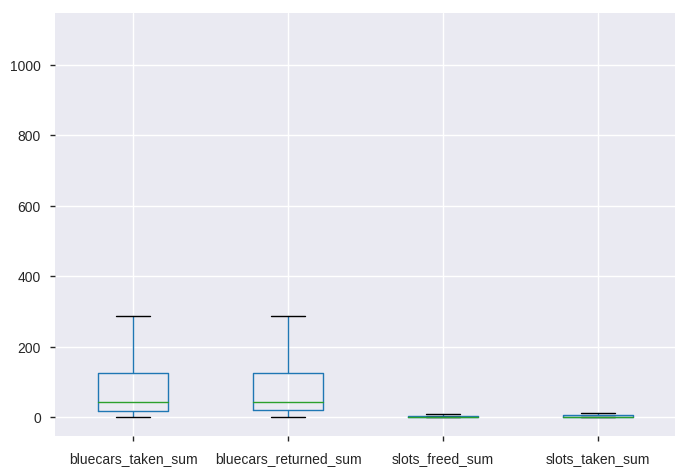

In [121]:
## Box plot for columns bluecars_taken_sum, bluecars_returned_sum, slots_freed_sum and slots_taken_sum
boxplot = bl.boxplot(column=['bluecars_taken_sum','bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], return_type='axes')
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

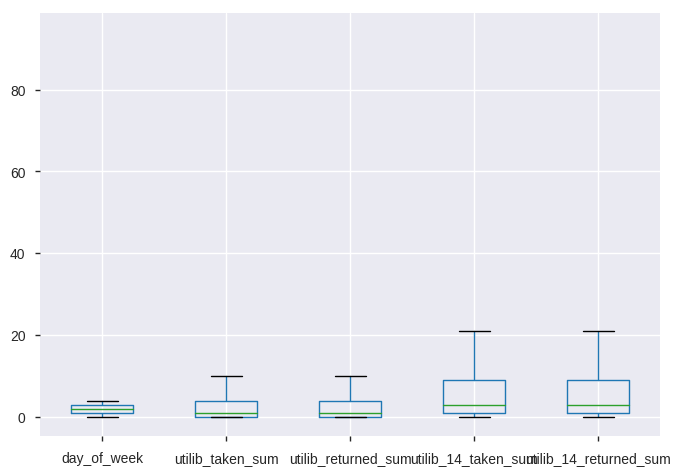

In [122]:
## Box plot for columns 'day_of_week', 'utilib_taken_sum', 'utilib_returned_sum','utilib_14_taken_sum' and 'utilib_14_returned_sum'
boxplot = bl.boxplot(column=['day_of_week', 'utilib_taken_sum', 'utilib_returned_sum','utilib_14_taken_sum', 'utilib_14_returned_sum'], return_type='axes')
type(boxplot)

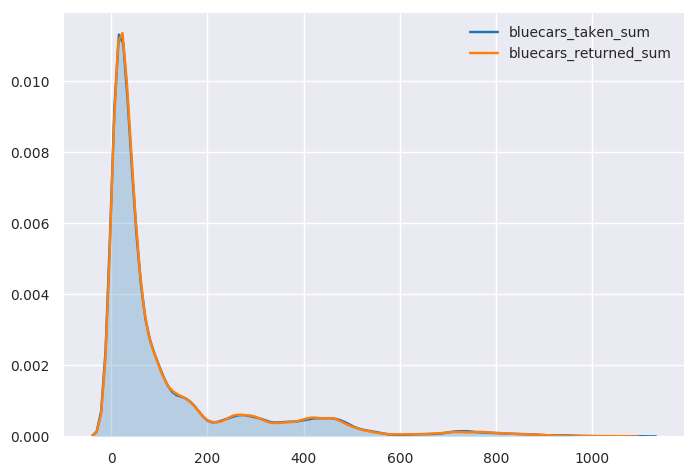

In [136]:
##
sns.set_style('darkgrid')
sns.kdeplot(bl.bluecars_taken_sum, shade=True)
sns.kdeplot(bl.bluecars_returned_sum)
plt.legend();

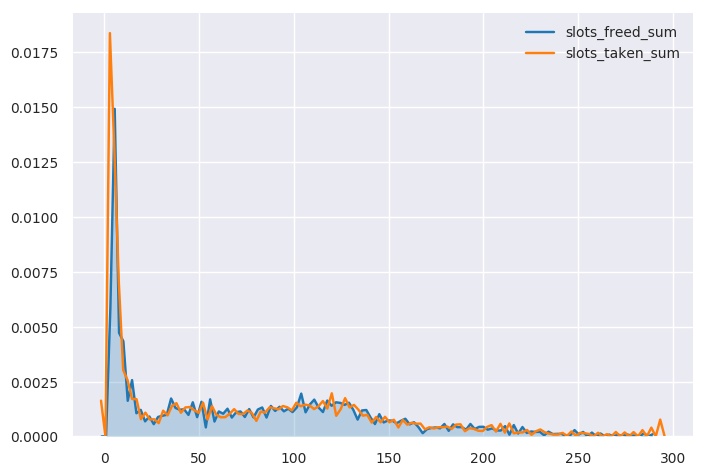

In [138]:
##
##
sns.set_style('darkgrid')
sns.kdeplot(bl.slots_freed_sum, shade=True)
sns.kdeplot(bl.slots_taken_sum)
plt.show();

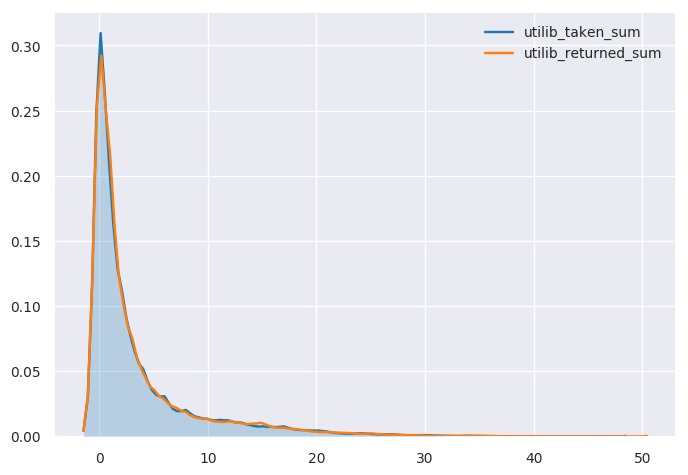

In [140]:
# utilib_taken_sum', 'utilib_returned_sum',
#       
sns.set_style('darkgrid')
sns.kdeplot(bl.utilib_taken_sum, shade=True)
sns.kdeplot(bl.utilib_returned_sum)
plt.show();

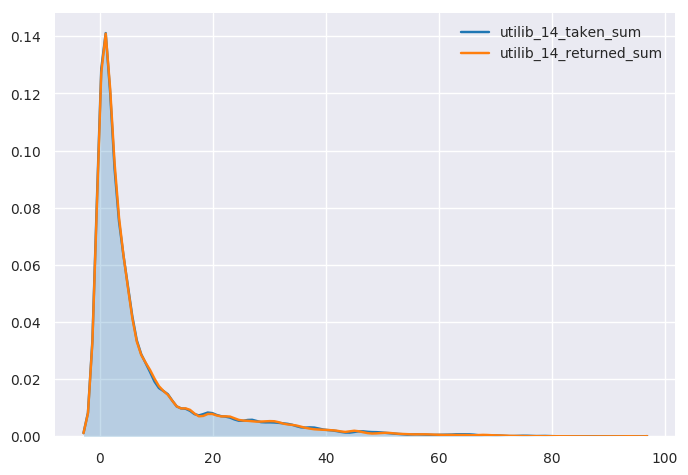

In [141]:
##
#   'utilib_14_taken_sum', 'utilib_14_returned_sum',
sns.set_style('darkgrid')
sns.kdeplot(bl.utilib_14_taken_sum, shade=True)
sns.kdeplot(bl.utilib_14_returned_sum)
plt.show();

## Bivariate

## Hypothesis Testing

### Null Hypothesis

Friday does not have the highest sum of bluecars taken

### Alternative Hypothesis

Friday has the highest sum of  bluecars taken 

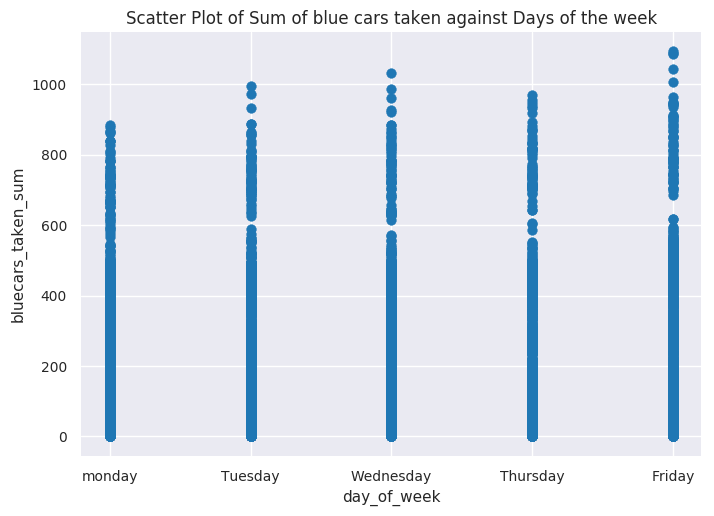

In [151]:
##
## scatter plot of blue cars taken against day of the week


plt.scatter(bl['day_of_week'], bl['bluecars_taken_sum'])
plt.title('Scatter Plot of Sum of blue cars taken against Days of the week')

plt.xlabel('day_of_week')

plt.ylabel('bluecars_taken_sum')

plt.show()

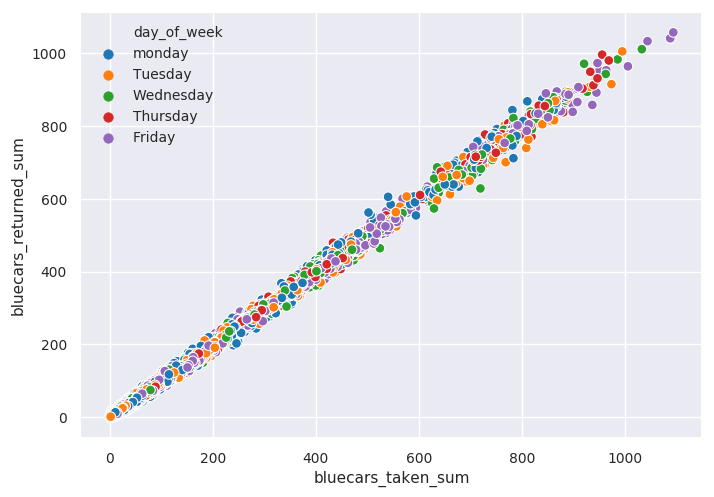

In [170]:
## Sctter plot of sum of blue cars returned against sum of bluecars taken using days of the week
#
plt.figure(dpi=100)
sns.scatterplot(x='bluecars_taken_sum', y='bluecars_returned_sum', hue='day_of_week', data=bl)

The sum of the bluecars taken and sum of bluecars returned increases as the week progresses this shows that it has a positive linear correlation and a strong correlation as the points re closer to the line of besst fit

<Figure size 800x800 with 0 Axes>

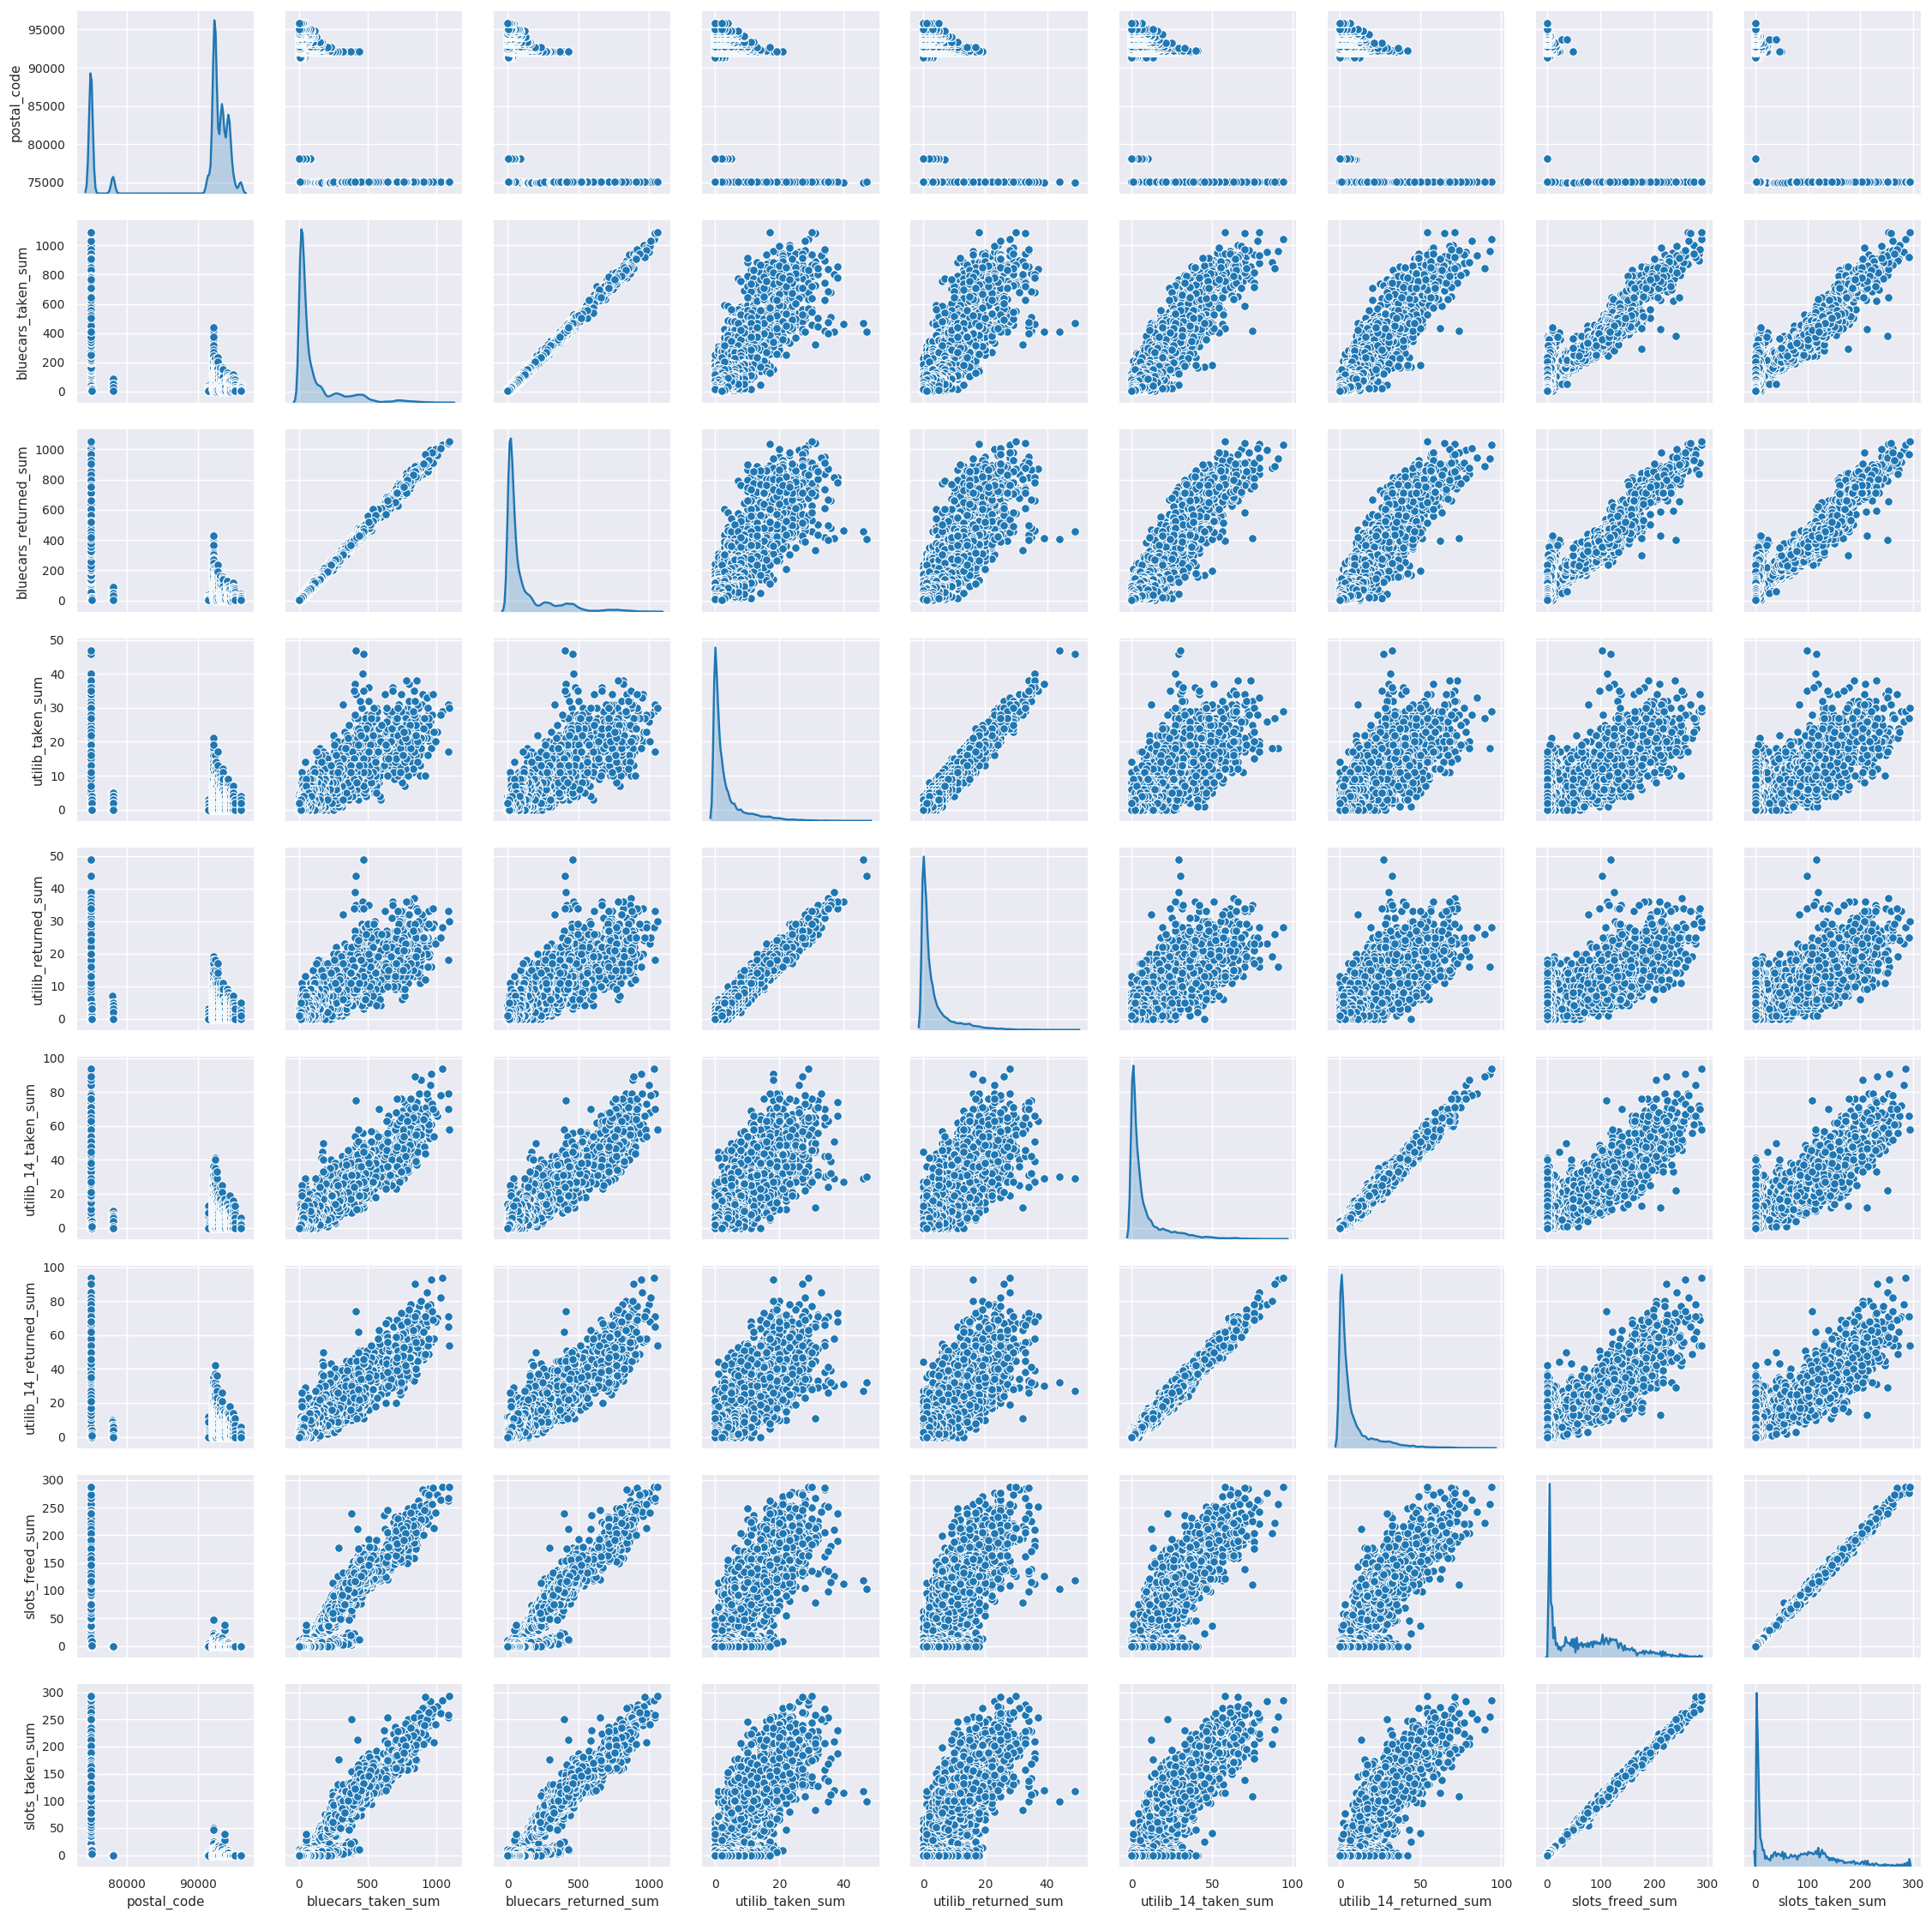

In [154]:
## Correlation of columns on the dataframe

plt.figure(figsize=(8, 8))
sns.pairplot(bl, diag_kind='kde');

In [162]:
##
## check correlation
#
bl2 = bl["bluecars_taken_sum"].corr(bl["bluecars_returned_sum"])
bl2

0.9987802776217566

In [165]:
## correlation of the dataframe
bl.corr()

,postal_code,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,-0.701709,-0.701877,-0.629116,-0.629190,-0.661567,-0.661256,-0.754730,-0.754422
bluecars_taken_sum,-0.701709,1.000000,0.998780,0.884239,0.883856,0.938730,0.937613,0.945700,0.944855
bluecars_returned_sum,-0.701877,0.998780,1.000000,0.884533,0.884332,0.939084,0.938248,0.945758,0.946006
utilib_taken_sum,-0.629116,0.884239,0.884533,1.000000,0.979469,0.836193,0.835359,0.845480,0.844701
utilib_returned_sum,-0.629190,0.883856,0.884332,0.979469,1.000000,0.835772,0.835549,0.845527,0.845376
utilib_14_taken_sum,-0.661567,0.938730,0.939084,0.836193,0.835772,1.000000,0.990960,0.895978,0.895574
utilib_14_returned_sum,-0.661256,0.937613,0.938248,0.835359,0.835549,0.990960,1.000000,0.895244,0.895647
slots_freed_sum,-0.754730,0.945700,0.945758,0.845480,0.845527,0.895978,0.895244,1.000000,0.999154
slots_taken_sum,-0.754422,0.944855,0.946006,0.844701,0.845376,0.895574,0.895647,0.999154,1.000000


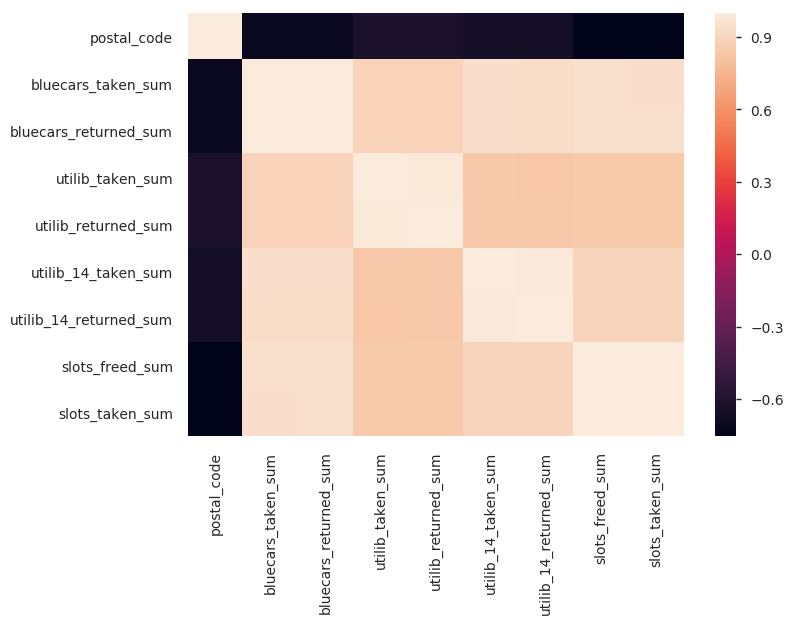

In [167]:
# Plot the correlation using a heatmap.
# ---
sns.heatmap(bl.corr())

The black colour represents that there is no linear relationship between the two variables. 
A lighter shade shows that the relationship between the variables is more linear.

## Sampling

In [187]:
## Value_counts for day_of_week
#
bl.day_of_week.value_counts()

monday       2374
Tuesday      2363
Friday       2271
Wednesday    2268
Thursday     2268
Name: day_of_week, dtype: int64

In [186]:
##
# Creating a stratified random sample using the pandas groupby function that splits our dataset into sets then applies
# a function on each set
# The sample is 50% of the population
bl3 = bl.groupby(['day_of_week', 'bluecars_taken_sum'], group_keys=False).apply(lambda xl : xl.sample(frac=0.5))
print(bl3['day_of_week'].value_counts())
print(bl3['bluecars_taken_sum'].value_counts())

monday       1106
Tuesday      1086
Wednesday    1060
Thursday     1054
Friday       1031
Name: day_of_week, dtype: int64
12     104
9      100
11      99
10      99
14      97
13      94
7       84
19      80
16      79
24      79
17      79
8       78
5       77
15      77
28      76
20      74
3       74
21      74
29      73
23      73
26      73
18      72
25      69
4       66
6       64
27      62
30      56
2       55
33      54
22      54
      ... 
628      1
612      1
540      1
536      1
500      1
496      1
305      1
317      1
182      1
325      1
781      1
757      1
741      1
737      1
713      1
839      1
629      1
557      1
525      1
505      1
501      1
481      1
477      1
397      1
385      1
369      1
365      1
341      1
329      1
705      1
Name: bluecars_taken_sum, Length: 488, dtype: int64


In [194]:
bl3.head()

,postal_code,date,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
11841,93370,2018-02-09,Friday,0,2,0,0,0,0,0,0
11880,93370,2018-03-23,Friday,0,2,0,0,0,0,0,0
10783,93200,2018-03-16,Friday,0,2,0,0,0,0,0,0
12011,93390,2018-05-25,Friday,1,4,1,0,0,0,0,0
10478,93150,2018-02-16,Friday,1,2,0,0,1,2,0,0


In [219]:
##
new_bl = bl3[(bl3.day_of_week == 'Friday')]
new_bl.bluecars_taken_sum = bl3.bluecars_taken_sum

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [222]:
new_bl.day_of_week.value_counts()

Friday    1031
Name: day_of_week, dtype: int64

In [220]:
new_bl.tail()

,postal_code,date,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2453,75016,2018-04-27,Friday,746,765,15,17,56,55,153,160
2647,75017,2018-06-15,Friday,766,753,23,21,54,53,192,189
2365,75016,2018-01-26,Friday,791,776,20,21,62,63,224,220
2439,75016,2018-04-13,Friday,850,861,16,17,40,40,188,196
2269,75015,2018-03-30,Friday,867,894,27,27,52,54,252,261


In [216]:
## shape
new_bl.shape

(1031, 11)

In [225]:
## Sample size
len(new_bl)

1031

In [224]:
## Using z-test and p-values to verify the hypothesis whether not to be rejected or to be rejected
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(new_bl['bluecars_taken_sum'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.628387661707387e-60
reject null hypothesis


Reject the null hypothesis as the p-value is less than our alpha which is 0.05

## Multivariate

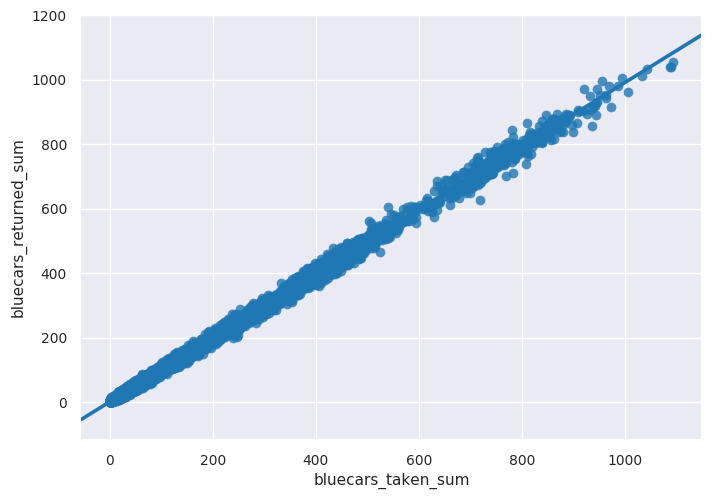

In [171]:
##
##
sns.regplot(x='bluecars_taken_sum', y='bluecars_returned_sum', data=bl)

There is a positive linear relationship between the sum of bluecars taken and sum of bluecars returned, this means that as bluecars taken increases so does the bluecars returned increases